### Problem Statement

The goal is to use Inductive Logic Programming (ILP) with Aleph to learn Prolog rules that classify individuals as earning `more_than_50k` based on background attributes like education, occupation, and marital status. The task focuses on generating accurate and interpretable rules from positive and negative examples.


In [1]:
!add-apt-repository -y ppa:swi-prolog/stable

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/swi-prolog/stable/ubuntu/ jammy main'
Description:
Comprehensive Prolog implementation with extensive libraries and development tools.   Primarily targetted at teaching, RDF processing and web-related tasks, such as creating web services or analysing web content.

Official PPAs for SWI-Prolog. See https://www.swi-prolog.org for further information.
More info: https://launchpad.net/~swi-prolog/+archive/ubuntu/stable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/swi-prolog-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/swi-prolog-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/swi-prolog-ubuntu-stable.gpg with fingerprint E8B739E3753FF4A12360BA6A4AB3A5F60EA9AEB3
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/

In [2]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/swi-prolog/stable/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry 

In [3]:
!apt-get install swi-prolog

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libedit-dev libgmp-dev libgmpxx4ldbl libossp-uuid16 swi-prolog-nox
  swi-prolog-x
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev uuid prolog-el
The following NEW packages will be installed:
  libedit-dev libgmp-dev libgmpxx4ldbl libossp-uuid16 swi-prolog
  swi-prolog-nox swi-prolog-x
0 upgraded, 7 newly installed, 0 to remove and 46 not upgraded.
Need to get 7,368 kB of archives.
After this operation, 38.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libedit-dev amd64 3.1-20210910-1build1 [118 kB]
Get:2 https://ppa.launchpadcontent.net/swi-prolog/stable/ubuntu jammy/main amd64 swi-prolog-nox amd64 9.2.9-2-g2a3e80b8e-jammyppa2 [4,653 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:4 http://archive.ubuntu.com/ub

In [4]:
!apt-get install -y build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [5]:
!pip install janus_swi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for janus_swi: filename=janus_swi-1.5.2-cp311-cp311-linux_x86_64.whl size=156192 sha256=1a5da8ec658c50a9097657cb07b561f6897c9086ce77e4a21367e30d8a2fa17d
  Stored in directory: /root/.cache/pip/wheels/64/aa/bd/1a1dfdb816b21906027aee730b1a5600deafa0f445cc83506b
Successfully built janus_swi


In [6]:
!pip3 install PyILP
!pip install Texttable

In [7]:
# STEP 2: Import libraries
import pandas as pd
from  PyILP.PyILP import *
from pathlib import Path

In [8]:
# STEP 3: Load the preprocessed dataset
df = pd.read_csv("/content/processed_ilp_aleph_dataset.csv")
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,middle,local_gov,masters,married_civ_spouse,protective_serv,husband,white,male,average,unknown,greater_50k
1,middle,private,masters,married_civ_spouse,prof_specialty,husband,white,male,average,unknown,greater_50k
2,middle,federal_gov,masters,married_civ_spouse,adm_clerical,husband,white,male,average,unknown,greater_50k
3,middle,private,some_college,married_civ_spouse,sales,husband,white,male,average,unknown,greater_50k
4,young,private,assoc_acdm,married_civ_spouse,sales,husband,white,male,average,unknown,greater_50k


### Installing Aleph in SWI-Prolog

To perform Inductive Logic Programming (ILP) using the Aleph system in SWI-Prolog, we first need to install the `aleph` package.  
Hence we do: pack_install(aleph). inside swipl

In [9]:
!swipl

Welcome to SWI-Prolog (threaded, 64 bits, version 9.2.9)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

).

Create directory for packages
   (1) * /root/.local/share/swi-prolog/pack
   (2)   /usr/share/swi-prolog/pack
   (3)   Cancel

Your choice? 
% Contacting server at https://www.swi-prolog.org/pack/query ... ok
Installation plan:
  Install aleph at version 5 from https://github.com/friguzzi/aleph.git (downloaded 655 times)
Download packs? Y/n? 
Cloning into '/root/.local/share/swi-prolog/pack/aleph'...
Already up to date.
% Contacting server at https://www.swi-prolog.org/pack/query ... ok
true.

?- ^C
Action (h for help) ? ^C

Action (h for help) ? ^C
^C


In [12]:
!swipl Background1.pl

Welcome to SWI-Prolog (threaded, 64 bits, version 9.2.9)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- induce.
[select example] [1]
[sat] [1]
[more_than_50k(p1)]

[bottom clause]
more_than_50k(A) :-
   age(A,middle), workclass(A,private), education(A,assoc_voc), marital_status(A,married_civ_spouse), 
   occupation(A,sales), relationship(A,husband), race(A,white), sex(A,male), 
   hours_per_week(A,medium), native_country(A,unknown).
[literals] [11]
[saturation time] [0.0011965180000000075]
[reduce]
[best label so far] [[1,0,2,0]/0]
more_than_50k(A).
[25/25]
more_than_50k(A) :-
   age(A,middle).
[19/13]
more_than_50k(A) :-
   workclass(A,private).
[14/24]
more_than_50k(A) :-
   education(A,assoc_voc).
more_than_50k(A) :-
   marital_status(A,married_civ_spouse).
[22/6]
more_than_50k(A) :-
   occup

### **Description and observation of first run:**

For this Aleph ILP run, we used a .pl file containing background knowledge and examples to learn rules for predicting whether an individual earns more_than_50k. The background predicates included were marital_status/2, occupation/2, education/2, workclass/2, and race/2. Positive and negative examples were defined accordingly. We configured Aleph with minpos=2 to ensure each learned clause covers at least two positive examples, avoiding overly specific rules.

**Three rules were induced:**

1. Rule 3: Individuals who are married (married_civ_spouse) and work in exec_managerial roles are classified as more_than_50k. This rule covered 6 positive examples and no negatives.

2. Rule 4: Individuals from the self_emp_not_inc workclass are also classified as more_than_50k, covering 4 positives with 0 negatives.

3. Rule 5: Individuals with a bachelors degree and white race are predicted as more_than_50k, covering 7 positives and 1 negative.

The induced theory achieved **80% accuracy** on the training set. The confusion matrix showed 16 true positives, 1 false positive, 9 false negatives, and 24 true negatives. In total, 1215 clauses were constructed in 0.17 seconds. The rules are interpretable and generalize well, with minimal overfitting in Rule 5.

In [13]:
!swipl Background2.pl

Welcome to SWI-Prolog (threaded, 64 bits, version 9.2.9)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- induce.
[select example] [1]
[sat] [1]
[more_than_50k(p1)]

[bottom clause]
more_than_50k(A) :-
   age(A,middle), workclass(A,private), education(A,assoc_voc), marital_status(A,married_civ_spouse), 
   occupation(A,sales), relationship(A,husband), race(A,white), sex(A,male), 
   hours_per_week(A,medium), native_country(A,unknown).
[literals] [11]
[saturation time] [0.0011929169999999878]
[reduce]
[best label so far] [[1,0,2,0]/0]
more_than_50k(A).
[25/25]
more_than_50k(A) :-
   age(A,middle).
[19/13]
more_than_50k(A) :-
   workclass(A,private).
[14/24]
more_than_50k(A) :-
   education(A,assoc_voc).
more_than_50k(A) :-
   marital_status(A,married_civ_spouse).
[22/6]
more_than_50k(A) :-
   occup

### **Description and observation of second run:**

In this second ILP run using Aleph, we expanded the background knowledge and examples in the .pl file to include additional positive instances. We again set minpos=2 to ensure clauses cover at least two positive examples. Background predicates such as marital_status/2, occupation/2, education/2, workclass/2, and race/2 were retained. Aleph induced 12 rules. Rules 1, 2, and 6–12 are individual facts directly classifying specific persons as more_than_50k. Rules 3 to 5 are general and interpretable:

1. Rule 3: Individuals who are married and in executive/managerial roles are predicted as more_than_50k (6 positives, 0 negatives).

2. Rule 4: Individuals with workclass self_emp_not_inc are also positively classified (4 positives, 0 negatives).

3. Rule 5: Individuals with a bachelor’s degree and white race are classified as more_than_50k (7 positives, 1 negative).

This run achieved **98% accuracy** on the training set. The confusion matrix showed 25 true positives, 1 false positive, and 24 true negatives, with no false negatives. Aleph constructed 1216 clauses in 0.18 seconds. The increase in factual rules led to a near-perfect fit, although the model may risk overfitting due to overly specific facts.

### Graphical Visualization

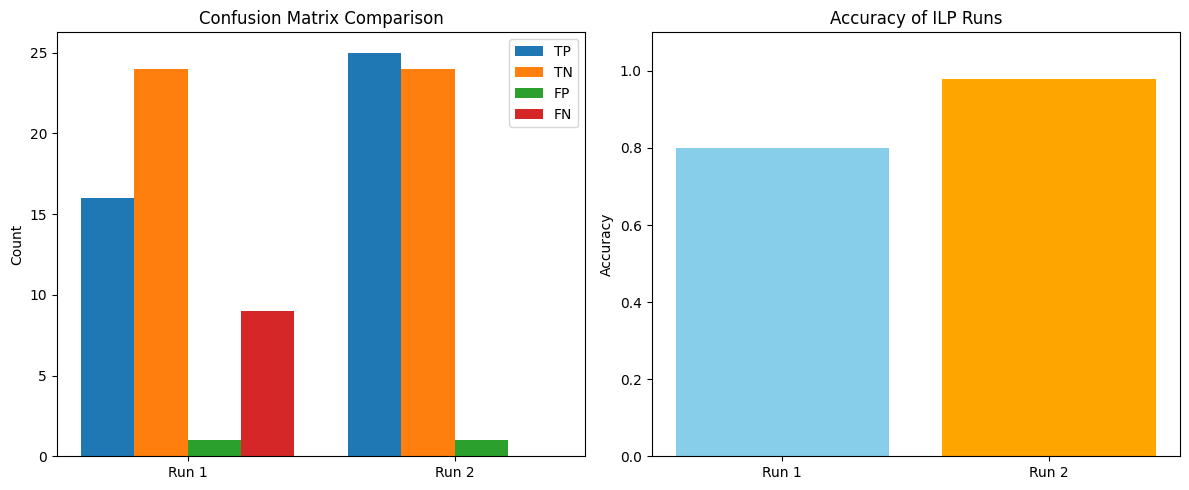

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
runs = ['Run 1', 'Run 2']
tp = [16, 25]
tn = [24, 24]
fp = [1, 1]
fn = [9, 0]
accuracy = [0.80, 0.98]

# Set positions
x = np.arange(len(runs))
width = 0.2

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Confusion Matrix Comparison
ax1.bar(x - 1.5*width, tp, width, label='TP')
ax1.bar(x - 0.5*width, tn, width, label='TN')
ax1.bar(x + 0.5*width, fp, width, label='FP')
ax1.bar(x + 1.5*width, fn, width, label='FN')
ax1.set_ylabel('Count')
ax1.set_title('Confusion Matrix Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(runs)
ax1.legend()

# 2. Accuracy Comparison
ax2.bar(runs, accuracy, color=['skyblue', 'orange'])
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy of ILP Runs')
ax2.set_ylim(0, 1.1)

# Show both plots
plt.tight_layout()
plt.show()


### Conclusion

1. The ILP experiments using Aleph demonstrate how logical rules can be effectively induced from structured background knowledge to classify income levels. In Run 1, we focused solely on general rules and achieved 80% accuracy. In Run 2, by adding specific factual rules alongside general ones, accuracy improved to 98%, with no false negatives.

2. However, this gain comes at a cost — Run 2 risks overfitting due to the inclusion of instance-specific rules that may not generalize well to unseen data. The confusion matrix comparison highlights this: Run 2 shows perfect recall but may lack robustness outside the training set.

3. The bar charts offer clear insights into how rule complexity and coverage affect performance. While general rules support interpretability and generalization, specific rules can inflate accuracy on training data without truly improving model quality.

4. In conclusion, balancing generalization and specificity is key in ILP.